<a href="https://colab.research.google.com/github/ishanjabade/BML_ISHAN/blob/main/Experiment_10_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Apply PCA on dataset obtained from UCI ML repository.**

**Dataset Used: Heart Disease Dataset**

Step 1: Load and prepare the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

file_path = '/content/heart.csv'

# Add column names from dataset
columns = [
    'age','sex','cp','trestbps','chol','fbs','restecg',
    'thalach','exang','oldpeak','slope','ca','thal','num'
]

# Load data
df = pd.read_csv(file_path, names=columns, na_values='?')
df = df.dropna()

# Use 'num' as the target column
target = df['num']
data = df.drop(columns=['num'])

**Step 2: Apply PCA on the dataset**

In [6]:
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv("/content/heart.csv")

# Select only numeric columns for PCA
numeric_data = data.select_dtypes(include=[np.number])

# Standardization
mean = np.mean(numeric_data, axis=0)
std_dev = np.std(numeric_data, axis=0)
standardized_data = (numeric_data - mean) / std_dev

# Covariance matrix
cov_matrix = np.cov(standardized_data, rowvar=False)

# Eigenvalues & eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues (descending)
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

eigenvalues, eigenvectors


(array([3.31698522, 1.58975444, 1.23165025, 1.18049053, 1.0001815 ,
        0.97367732, 0.87728813, 0.7687807 , 0.73455514, 0.63403086,
        0.52864507, 0.43525723, 0.37298183, 0.36939367]),
 array([[ 2.52047979e-01,  4.34701840e-01,  3.71959559e-02,
          7.85277915e-02,  2.91115051e-01,  2.00121998e-01,
          2.49601873e-01, -2.28925819e-01, -3.93798031e-01,
         -9.84469942e-03, -1.03202886e-01, -5.36095932e-01,
         -6.64170440e-02,  2.06921112e-01],
        [ 1.12624662e-01, -3.97530501e-01, -4.98364518e-01,
         -2.79377508e-01, -5.35340741e-02, -2.74494742e-02,
          1.84397779e-01, -9.97567395e-02, -2.13899591e-01,
         -5.34733777e-01, -2.14899360e-01, -7.60289006e-02,
          2.67392754e-01,  1.17737900e-02],
        [-2.81923844e-01,  2.44594640e-01, -6.81289305e-02,
         -4.29156349e-01, -1.85221662e-01,  2.35805490e-01,
          2.16162711e-01,  1.24301913e-01, -2.90797343e-01,
         -1.66837460e-01,  5.29391841e-01,  1.97806901e-01

**Step 3: Visualize PCA Result**

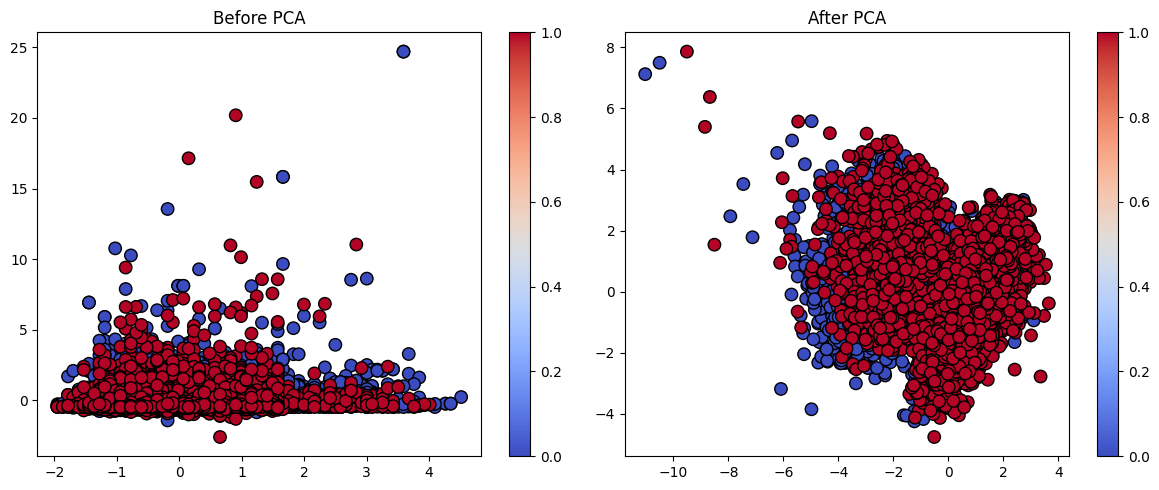

In [11]:
# Load data
df = pd.read_csv("/content/bank.csv")

# Separate features and target
X = df.drop("deposit", axis=1)
y = df["deposit"]

# Encode categorical columns in X
X_encoded = pd.get_dummies(X, drop_first=True)

# Remove any rows with NA (important!)
X_encoded, y = X_encoded.align(y, join='inner', axis=0)

# Standardize
mean = X_encoded.mean(axis=0)
std = X_encoded.std(axis=0)
X_std = (X_encoded - mean) / std

# Convert to numpy
X_std_np = X_std.to_numpy()

# PCA covariance
cov_matrix = np.cov(X_std_np, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvectors by eigenvalues
idx = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, idx]

# PCA projection
X_pca = X_std_np.dot(eigenvectors[:, :2])

# Encode target
y_numeric = pd.factorize(y)[0]
plt.figure(figsize=(12, 5))

# Before PCA
plt.subplot(1, 2, 1)
plt.scatter(
    X_std_np[:, 0], X_std_np[:, 1],
    c=y_numeric, cmap='coolwarm', edgecolor='k', s=80
)
plt.title("Before PCA")
plt.colorbar()

# After PCA
plt.subplot(1, 2, 2)
plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=y_numeric, cmap='coolwarm', edgecolor='k', s=80
)
plt.title("After PCA")
plt.colorbar()

plt.tight_layout()
plt.show()
